# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


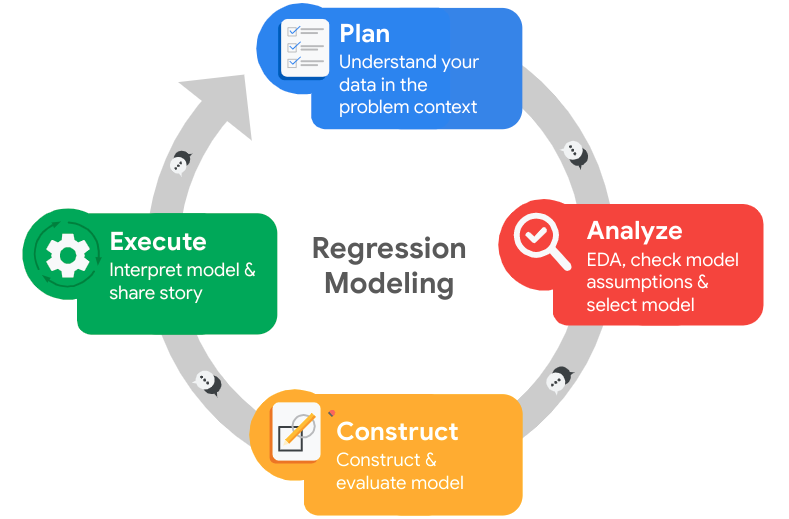

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Answers:**

* Salifort Motors' HR Department is the project stakeholder. They seek to identify the factors causing employees to leave, as it is expensive and time-consuming to replace them. Improving retention will reduce financial expenses.

* The stakeholder's objective is to develop a model that predicts if an employee will leave Salifort Motors.

* Based on initial data dictionary reviews, "left" appears to be the most suitable target variable. It describes whether an employee has left the company. Other variables will be used to predict if an employee has left (1) or stayed (0).

* For this project, the "HR_capstone_dataset.csv" data from [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv). The public dataset and its free use license are available [here](https://creativecommons.org/publicdomain/zero/1.0/).

* There is no personal information in the dataset, and no ethical issues seem to be present at this stage.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv('HR_capstone_dataset.csv')


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})


# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
print(f'The amount of duplicate data is {df0.duplicated().sum()}')

The amount of duplicate data is 3008


In [9]:
# Determine the percentage of duplicates in the data.
print(f'The percentage of duplicate data is {round((df0.duplicated().sum()/len(df0))*100, 2)}%')

The percentage of duplicate data is 20.05%


In [10]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

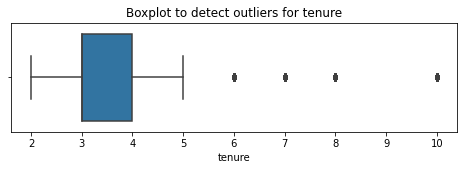

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize = (8,2))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
sns.boxplot(x = df1['tenure'])
plt.show()

In [13]:
# Determine the number of rows containing outliers

# Compute the 25th percentile value in 'tenure'
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in 'tenure'
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in 'tenure'
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in 'tenure'
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(f'Lower limit: {lower_limit}')
print(f'Upper limit: {upper_limit}')

# Identify subset of data containing outliers in 'tenure'
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in 'tenure'
print(f'Number of rows in the data containing outliers in "tenure" is {len(outliers)}')

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in "tenure" is 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Answers:**

* There are 14,999 entries with 10 columns in the dataset. There are 2 float64, 6 int64, and 2 object datatypes.

* The tenure variable has a normal distribution with some outliers, indicating employees with unusually long tenures.

* For consistency and to fix spelling mistakes, column names were renamed. 'time_spend_company' was renamed to 'tenure' to indicate the employee's tenure in years. 3008 duplicate rows were deleted because it is highly unlikely for 10 values in rows to match other rows.

* Some purposes of EDA are to understand data distribution, identify outliers, detect errors, find patterns, and inform feature engineering before building a predictive model.

* Previous course notebooks were utilized as references and guides.

* The ethical aspect of potentially excluding long-term employees with tenures over 5.5 years, which were outliers, was considered.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
map_val = {0: 'stayed', 1: 'left'}

# Get numbers of people who left vs. stayed
print('Number of people who stayed vs. left:')
print(df1['left'].map(map_val).value_counts())

print("")

# Get percentages of people who left vs. stayed
print('Percentage of people who stayed vs. left:')
print(df1['left'].map(map_val).value_counts(normalize=True) * 100)

Number of people who stayed vs. left:
stayed    10000
left       1991
Name: left, dtype: int64

Percentage of people who stayed vs. left:
stayed    83.39588
left      16.60412
Name: left, dtype: float64


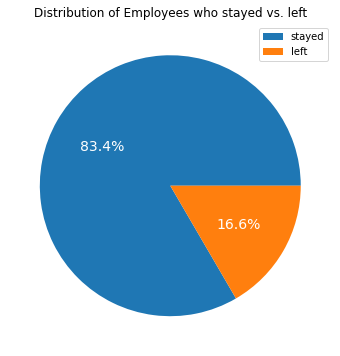

In [15]:
# Create a piechart to visualize distribution
labels = df1['left'].value_counts().index
sizes = df1['left'].value_counts().values

plt.figure(figsize=(8, 6))
plt.pie(sizes, autopct = '%1.1f%%', startangle = 0, textprops = {'fontsize':14, 'color':"w"})
plt.title('Distribution of Employees who stayed vs. left')
plt.legend(labels = ['stayed', 'left'])
plt.show()

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

To begin with, a stacked boxplot was created to show the distributions of `average_monthly_hours` for different `number_project` values, comparing the distributions of employees who stayed versus those who left.

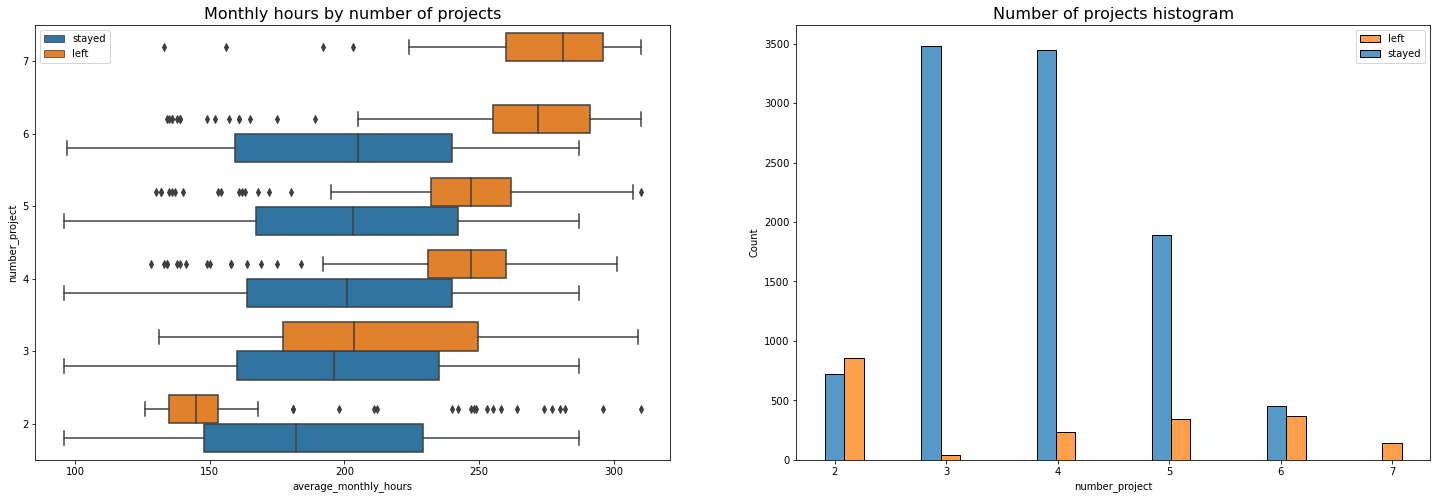

In [16]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (25,8))

# Create boxplot showing 'average_monthly_hours' distributions for 'number_project', comparing employees who stayed versus those who left
sns.boxplot(data = df1, x = 'average_monthly_hours', y = 'number_project', hue = 'left', orient = "h", ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='16')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles, ['stayed', 'left']) 


# Create histogram showing distribution of 'number_project', comparing employees who stayed versus those who left
sns.histplot(data = df1, x = 'number_project', hue = 'left', multiple = 'dodge', shrink = 2, ax = ax[1])
ax[1].set_title('Number of projects histogram', fontsize='16')
ax[1].legend(labels = ['left', 'stayed'])

# Display the plots
plt.show()


Here are some observations:

1. Two groups of employees left the company: those who worked less (possibly fired or resigned) and those who worked more (likely quit and top contributors);
2. Employees with seven projects left the company, working ~255–295 hours/month, more than any other group;
3. Employees working on 3–4 projects have a low left/stayed ratio, suggesting it's optimal;
4. With a 40-hour work week and two weeks of vacation, the average monthly hours is 166.67. All groups worked more, suggesting overwork.

After observation, it is necessary to make sure that all employees with seven projects left

In [17]:
# Get value counts of stayed/left for employees with 7 projects
print('Number of people who stayed vs. left for employees with 7 projects:')
print(df1[df1['number_project']==7]['left'].map({0: 'stayed', 1: 'left'}).value_counts())

Number of people who stayed vs. left for employees with 7 projects:
left    145
Name: left, dtype: int64


This confirms that every employee with 7 projects left the company.

The next step is to examine the relationship between average monthly hours and satisfaction levels.

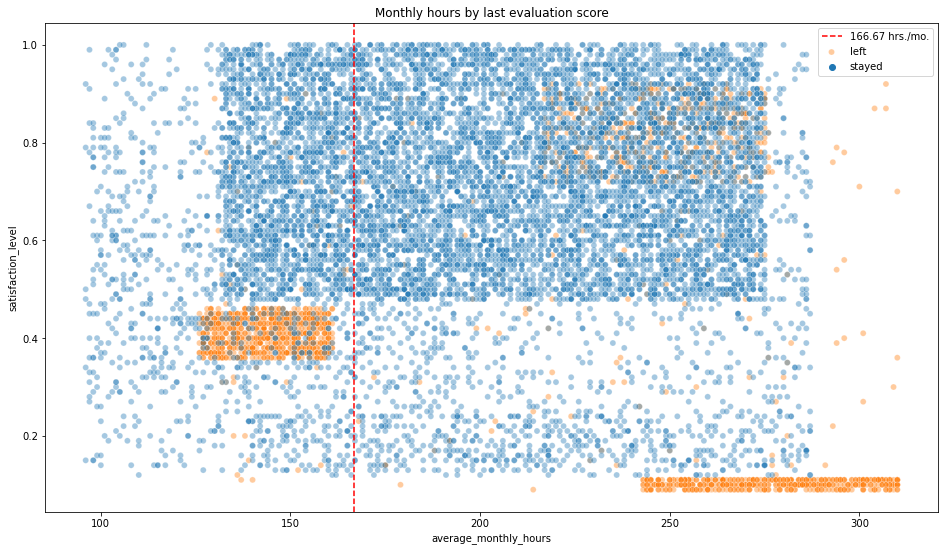

In [18]:
# Create scatterplot of 'average_monthly_hours' versus 'satisfaction_level', comparing employees who stayed versus those who left
plt.figure(figsize = (16, 9))
plt.title('Monthly hours by last evaluation score');
plt.axvline(x = 166.67, color = 'red', label = '166.67 hrs./mo.', ls = '--')
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left', alpha = 0.4)
plt.legend(labels = ['166.67 hrs./mo.', 'left', 'stayed'])
plt.show()

Here are some observations:

1. The scatterplot shows a group of employees working approximately 240–315 hours/month, likely affecting their low satisfaction levels;

2. Another group with normal hours also had low satisfaction (around 0.4), possibly due to peer pressure;

3. A third group worked approximately 210–280 hours/month with higher satisfaction levels (around 0.7–0.9);

4. The unusual distribution shapes suggest possible data manipulation or synthetic data.

In the next visualization, it could be useful to explore how satisfaction levels vary with tenure.

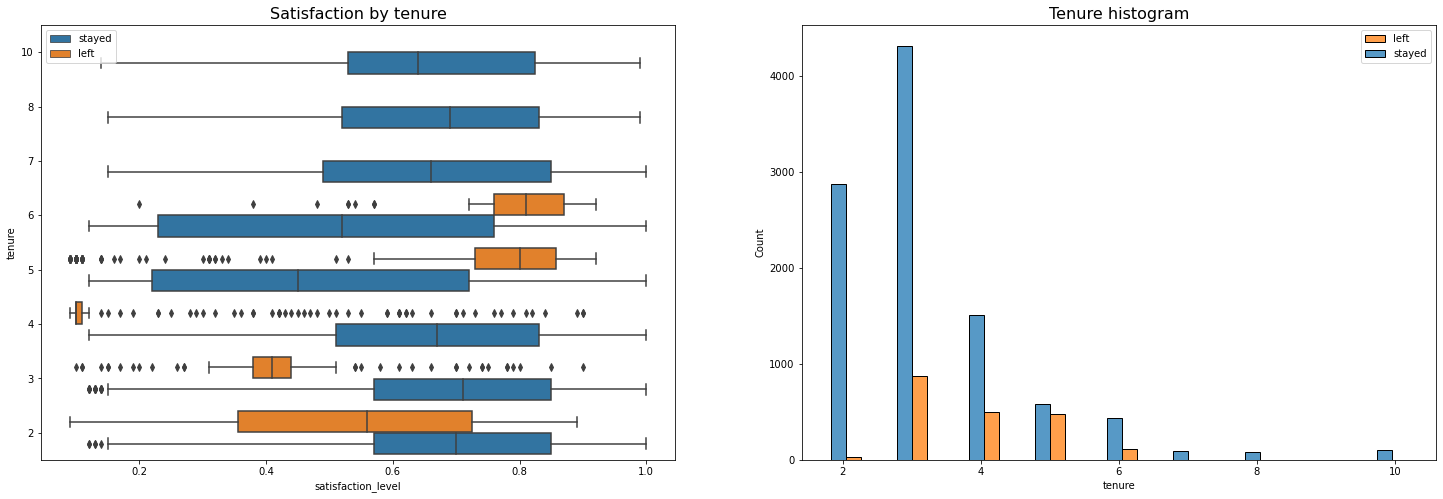

In [19]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (25, 8))

# Create boxplot showing distributions of 'satisfaction_level' by tenure, comparing employees who stayed versus those who left
sns.boxplot(data = df1, x = 'satisfaction_level', y = 'tenure', hue = 'left', orient = "h", ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='16')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles, ['stayed', 'left'], loc = 'upper left') 

# Create histogram showing distribution of 'tenure', comparing employees who stayed versus those who left
sns.histplot(data = df1, x = 'tenure', hue = 'left', multiple = 'dodge', shrink = 5, ax = ax[1])
ax[1].set_title('Tenure histogram', fontsize = '16')
ax[1].legend(labels = ['left', 'stayed'])

# Display the plots
plt.show()

Here are some observations:
    
1. There are two types of employees who left: dissatisfied ones with shorter tenures and very satisfied ones with medium-length tenures;

2. Employees who left after four years had unusually low satisfaction levels. It's worth looking into company policy changes that might have impacted them at the four-year mark;

3. The most tenured employees didn't leave, and their satisfaction matched that of newer employees who stayed;

4. Few longer-tenured employees are shown in the histogram. They could be higher-ranking, higher-paid employees.

Now, calculate the mean and median satisfaction scores for employees who left versus those who remained.

In [20]:
# Assuming df1 is your DataFrame and 'left' is a column with boolean values
#df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])
df1.groupby(df1['left'].map({0: 'stayed', 1: 'left'}))['satisfaction_level'].agg([np.mean, np.median]).rename_axis('title')

,mean,median
title,,
left,0.440271,0.41
stayed,0.667365,0.69


As can be seen, mean and median satisfaction scores are lower for employees who left than for those who stayed. Interestingly, the mean score for employees who stayed is slightly below the median, showing a left skew.

Next, consider exploring salary levels for different tenures.

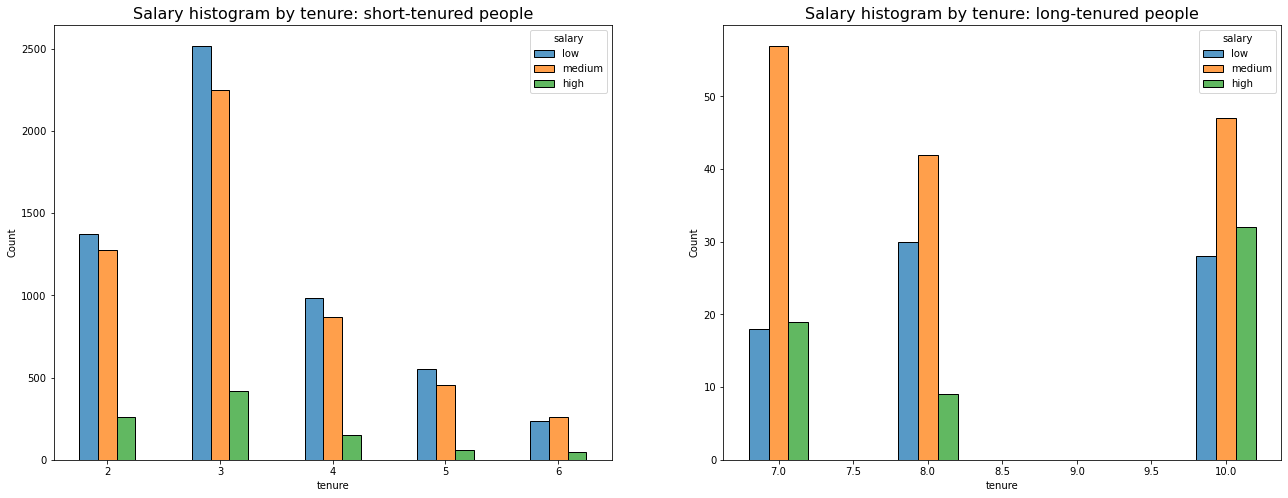

In [21]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured and long-tenured employees
tenure_short = df1[df1['tenure'] < 7]
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data = tenure_short, x = 'tenure', hue = 'salary', discrete = 1, hue_order = ['low', 'medium', 'high'], 
             multiple = 'dodge', shrink = .5, ax = ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize = '16')

# Plot long-tenured histogram
sns.histplot(data = tenure_long, x = 'tenure', hue = 'salary', discrete = 1, hue_order = ['low', 'medium', 'high'], 
             multiple = 'dodge', shrink = .4, ax = ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize = '16');

# Display the plots
plt.show()

According to the plots, long-tenured employees were not overly represented among higher-paid employees.

Next, explore whether there's a correlation between working long hours and receiving high evaluation scores by creating a scatterplot of `average_monthly_hours` versus `last_evaluation`.

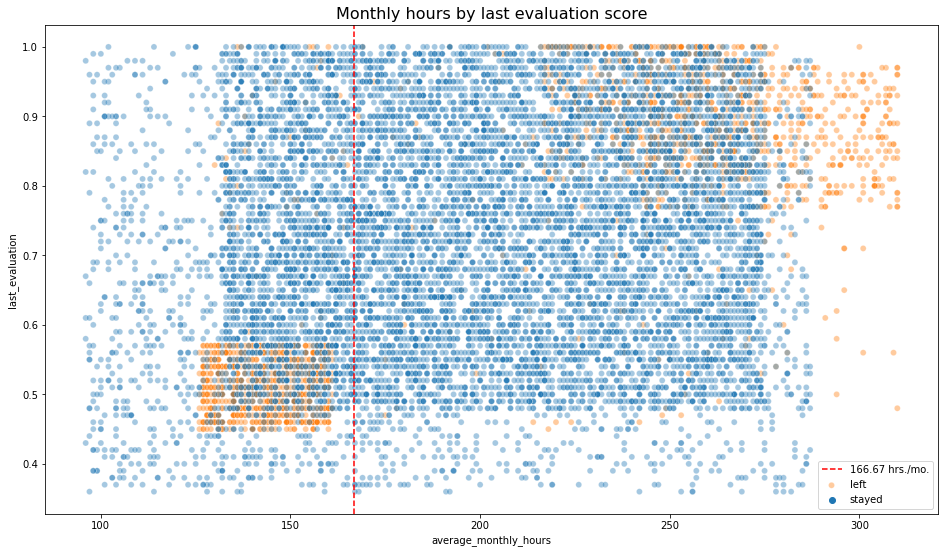

In [22]:
# Create scatterplot of 'average_monthly_hours' versus 'last_evaluation'
plt.figure(figsize = (16, 9))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left', alpha = 0.4)
plt.axvline(x = 166.67, color = 'red', label = '166.67 hrs./mo.', ls = '--')
plt.legend(labels = ['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize = '16');
plt.show()

Here are some observations:
    
1. The scatterplot shows two main groups among employees who left: overworked high achievers and those working just below 166.67 hours with lower evaluations;
    
2. Hours worked seems to correlate with evaluation scores;

3. The upper left quadrant has a low percentage of employees; long hours don't guarantee good evaluations;

4. Most employees put in well over 167 hours a month.



Afterward, determine if employees with extended work hours were promoted in the past five years.

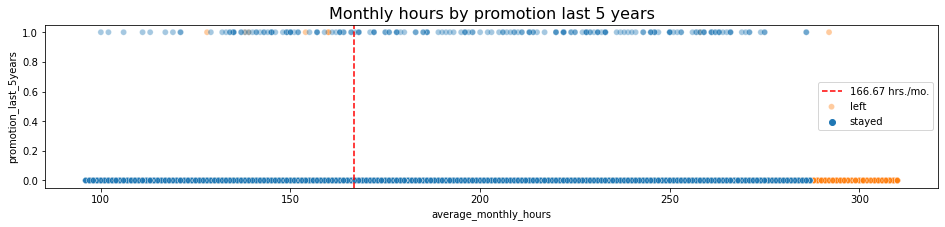

In [23]:
# Create plot to examine relationship between 'average_monthly_hours' and 'promotion_last_5years'
plt.figure(figsize=(16, 3))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'promotion_last_5years', hue = 'left', alpha = 0.4)
plt.axvline(x = 166.67, color = 'red', ls = '--')
plt.legend(labels = ['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize = '16');
plt.show()

Here are some observations:

1. Only a small number of employees promoted in the last five years have departed;

2. Only a handful of the most hardworking employees were promoted;

3. All departing employees had the highest work hours.

Subsequently, inspect how the employees who left are distributed across departments.

In [24]:
# Display counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

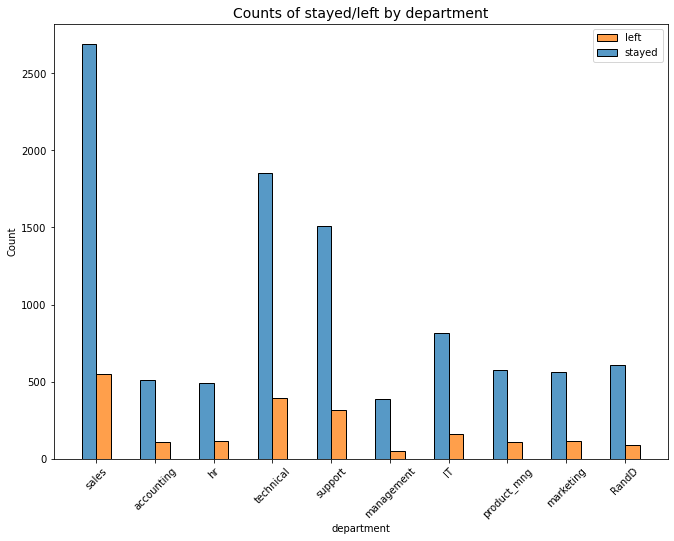

In [25]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize = (11,8))
sns.histplot(data = df1, x = 'department', hue = 'left', discrete = 1, hue_order = [0, 1], multiple = 'dodge', shrink = .5)
plt.xticks(rotation = '45')
plt.title('Counts of stayed/left by department', fontsize=14);
plt.legend(labels = ['left', 'stayed'])
plt.show()

It seems that no department has a markedly different ratio of employees who left versus those who stayed.

Finally, inspect for strong correlations between variables in the data.

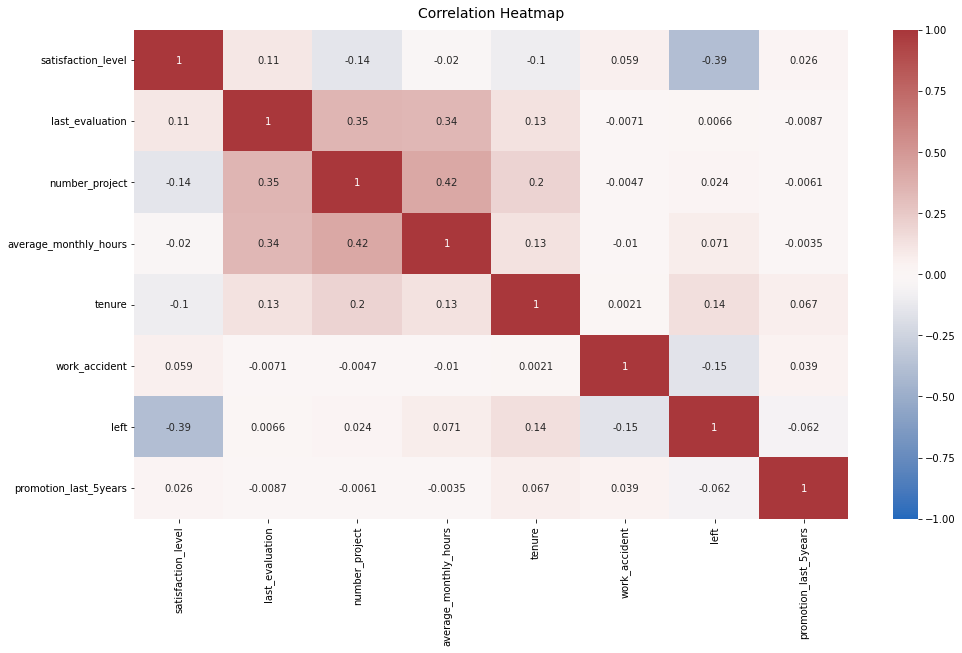

In [26]:
# Plot a correlation heatmap
plt.figure(figsize = (16, 9))
heatmap = sns.heatmap(df0.corr(), vmin = -1, vmax = 1, annot = True, cmap = sns.color_palette("vlag", as_cmap = True))
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':14}, pad = 12)
plt.show()

According to the correlation heatmap, there's a positive correlation between the number of projects, monthly hours, and evaluation scores, and a negative correlation between employee turnover and satisfaction levels.

### Insights

The data suggests that poor management is causing employees to leave. This is linked to longer working hours, a higher number of projects, and lower satisfaction levels, leading to burnout. Nonetheless, employees who have been with the company for over six years are more likely to remain.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



**Answers:**

* Slight drop in some performance metrics and potential data leakage;

* `last_evaluation`, `number_project`, `tenure`, and `overworked` due to their high importance and predictive power;

* Yes, all assumptions for decision trees are met;

* The model fits the data well, with high performance metrics;

* Consider additional feature engineering and alternative models for improvement;

* Previous notebooks were used as resources and guides; 

* The column `average_monthly_hours` was removed  to prevent potential data leakage, as this variable may be influenced by whether employees decided to leave or were selected for termination, thus affecting the model's accuracy.



## Step 3. Model Building
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The aim is to predict employee attrition, which is a categorical outcome variable. This task involves binary classification, as the outcome variable "left" can either be 1 (indicating the employee left) or 0 (indicating the employee stayed).

### Identify the types of models most appropriate for this task.

Given that the target variable (whether an employee leaves the company) is categorical, a Logistic Regression model or a Tree-based Machine Learning model can be built.

In this case, the focus will be on employing a Tree-based Machine Learning model.

### Modeling Approach: Tree-based Model
This approach covers implementation of Decision Tree and Random Forest.

First of all, encode the non-numeric variables. There are two: `department` and `salary`:
    
* The `department` variable is categorical, which allows for dummy encoding in modeling.

* The `salary` variable is also categorical, but it's ordinal with a hierarchy among categories. Instead of dummy encoding, it's preferable to convert the levels to numeric values, 0-2.

In [27]:
# Copy the dataframe
df_enc = df1.copy()

In [28]:
# Encode the 'salary' column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes)

In [29]:
# Dummy encode the 'department' column
df_enc = pd.get_dummies(df_enc, drop_first=False)

In [30]:
# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Construct a heatmap to visualize variable correlations.

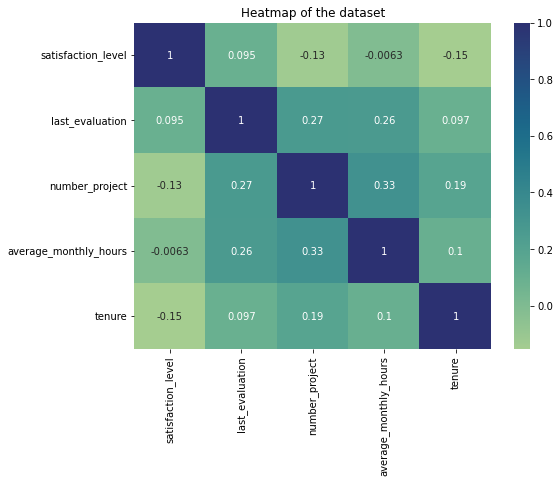

In [31]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot = True, cmap = "crest")
plt.title('Heatmap of the dataset')
plt.show()

Construct a stacked bar chart to depict the number of employees in different departments, comparing those who left and those who did not.

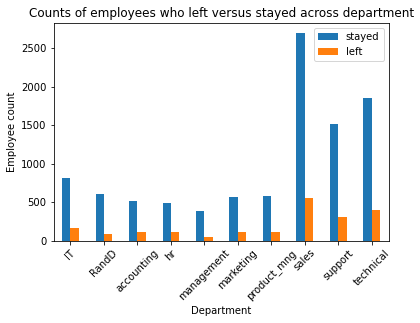

In [32]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 'stayed' represents employees who did not leave, 'left' represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.xticks(rotation = '45')
plt.legend(labels = ['stayed', 'left'])
plt.show()

Now, isolate the outcome variable which represents the model's prediction focus.

In [33]:
# Isolate the outcome variable
y = df_enc['left']

In [34]:
# Display the first few rows of 'y'
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

And select the features to be included in the model. Consider variables that will aid in predicting the outcome variable `left`.

In [35]:
# Select the features
X = df_enc.drop('left', axis=1)

In [36]:
# Display the first few rows of `X`
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


Split the data into training, validating, and testing sets. Also, it's important to stratify based on the values in y, as the classes are unbalanced.

In [37]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

After all the preliminary manipulations, it's time to move on to building models.

#### Decision tree - Round 1

Build a decision tree model and configure a cross-validated grid search to thoroughly find the optimal model parameters.

In [38]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
first_tree = GridSearchCV(tree, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

Train the decision tree model using the training dataset.

In [39]:
%%time
first_tree.fit(X_train, y_train)

CPU times: user 2.98 s, sys: 0 ns, total: 2.98 s
Wall time: 2.98 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

After training the first tree, it's time to get the results.

First, find the optimal settings for the decision tree parameters.

In [40]:
# Check best parameters
first_tree.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

Next, find the best AUC score obtained by the decision tree model on the training dataset.

In [41]:
# Check best AUC score on CV
print(f'Best AUC score on CV: {first_tree.best_score_}')

Best AUC score on CV: 0.969819392792457


This high AUC score indicates that the model is highly effective at predicting employee turnover.

The next step involves writing a function to extract all scores from the grid search.

In [42]:
def make_results(model_name:str, model_object, metric:str):
    '''  
    The function that returns a pandas DataFrame with the F1, recall, precision, accuracy, and AUC 
    scores for the model with the best mean 'metric' score across all validation folds. 
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

Finally, apply the defined function to retrieve all scores from the grid search.

In [43]:
# Get all CV scores
first_tree_cv_results = make_results('first decision tree cv', first_tree, 'auc')
first_tree_cv_results

,model,precision,recall,F1,accuracy,auc
0,first decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


All these metrics from the decision tree model indicate robust performance. 

However, decision trees can be prone to overfitting, whereas random forests prevent this by using multiple trees for stable predictions. 

Building a random forest model could be the next move.

#### Random forest - Round 1

First, construct a random forest model and apply a cross-validated grid search to comprehensively search for the best model parameters.

In [44]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
first_rf = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc', n_jobs=-1)

Secondly, train the random forest model using the training dataset.

In [45]:
%%time
first_rf.fit(X_train, y_train) 

CPU times: user 5.72 s, sys: 502 ms, total: 6.22 s
Wall time: 7min 18s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

After training the model, it is good practice to save it.

In [46]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

Next, implement functions for pickling the model and reading it back.

In [47]:
def write_pickle(path, model_object, save_as:str):
    '''
    The function that calls to pickle the model in the indicated folder.
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [48]:
def read_pickle(path, saved_model_name:str):
    '''
    The function that returns the pickled model.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

Leverage the previously defined functions to save the model into a pickle file and subsequently load it.

In [49]:
# Write pickle
write_pickle(path, first_rf, 'hr_rf1')

In [50]:
# Read pickle
first_rf = read_pickle(path, 'hr_rf1')

Find the best AUC score obtained by the random forest model on the training dataset.

In [51]:
# Check best AUC score on CV
print(f'Best AUC score on CV: {first_rf.best_score_}')

Best AUC score on CV: 0.9804250949807172


Find the optimal settings for the parameters of the random forest model.

In [52]:
# Check best params
first_rf.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

Finally, accumulate the assessment scores for the decision tree and random forest models using the training dataset.

In [53]:
# Get all CV scores
first_rf_cv_results = make_results('first random forest cv', first_rf, 'auc')
print(first_tree_cv_results)
print(first_rf_cv_results)

                    model  precision    recall        F1  accuracy       auc
0  first decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
                    model  precision    recall        F1  accuracy       auc
0  first random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


Apart from recall (which is about 0.001 lower, a negligible difference), the random forest model's evaluation scores are higher than those of the decision tree model. This signifies that the random forest model predominantly outperforms the decision tree model.

Now, the final model's performance should be assessed using the test set.

Implement a function to gather all the performance scores from a model's predictions.

In [54]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    The function that generates a table of test scores, 
    returning a pandas DataFrame with precision, recall, F1, accuracy, and AUC scores for the model.
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

Proceed by using the best performing model to generate predictions on the test set.

In [55]:
# Get predictions on test data
first_rf_test_scores = get_scores('first random forest test', first_rf, X_test, y_test)
first_rf_test_scores

,model,precision,recall,f1,accuracy,AUC
0,first random forest test,0.964211,0.919679,0.941418,0.980987,0.956439


The test scores are very close to the validation scores, which is a good indication. This implies that the model is strong. Since this test set was reserved for this model, it provides greater confidence that the model's performance on this data is representative of its performance on new, unseen data.

#### Feature Engineering

Despite excellent performance, unrealistic results due to data leakage cannot be ruled out, where training data appears in the test data. This can lead to unrealistic evaluations.

The company likely won't report satisfaction levels for all employees, and the column `average_monthly_hours` might contain data leakage. If employees decided to leave or were identified for termination, they might work fewer hours.

The first round of models included all variables. In the next round, improved models will be developed with feature engineering.

To do this, `tranquil_level` can be dropped, and a new binary feature indicating if an employee is `overworked` can be created.

In [56]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

In [57]:
# Display first few rows of new dataframe
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [58]:
# Create 'overworked' column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

In [59]:
# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


Assuming that someone works 50 weeks a year, 5 days each week, and 8 hours each day, the average monthly work hours would be about 166.67.

Being overworked can be defined as working more than 175 hours per month on average.

To make the `overworked` column binary, the column can be reassigned using a boolean mask:

* `df3['overworked']` > 175 creates a series of booleans, with True for values greater than 175 and False for values less than or equal to 175.

* `.astype(int)` then converts all True values to 1 and all False values to 0.

In [60]:
# Define 'overworked' as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

Now, let's prepare the data for the second round

In [61]:
# Drop the 'average_monthly_hours' column
df2 = df2.drop('average_monthly_hours', axis=1)

In [62]:
# Display first few rows of resulting dataframe
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [63]:
# Isolate the outcome variable
y = df2['left']

In [64]:
# Select the features
X = df2.drop('left', axis=1)

In [65]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

After all the preparations, the process can advance to the second round.

#### Decision tree - Round 2

In [66]:
# Instantiate model
tree = DecisionTreeClassifier(random_state = 0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
second_tree = GridSearchCV(tree, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [67]:
%%time
second_tree.fit(X_train, y_train)

CPU times: user 2.38 s, sys: 0 ns, total: 2.38 s
Wall time: 2.37 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [68]:
# Check best params
second_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [69]:
# Check best AUC score on CV
print(f'Best AUC score on CV: {second_tree.best_score_}')

Best AUC score on CV: 0.9586752505340426


Despite lacking satisfaction levels and detailed working hours data, this model performs exceptionally well.

The next step is to compare the obtained results with the previous ones.

In [70]:
# Get all CV scores
second_tree_cv_results = make_results('second decision tree cv', second_tree, 'auc')
print(first_tree_cv_results)
print(second_tree_cv_results)

                    model  precision    recall        F1  accuracy       auc
0  first decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
                     model  precision    recall        F1  accuracy       auc
0  second decision tree cv   0.856693  0.903553  0.878882  0.958523  0.958675


Certain other scores have decreased, which is anticipated since fewer features were considered in this iteration of the model. Nonetheless, the scores remain impressive.

#### Random forest - Round 2

In [71]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
second_rf = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc', n_jobs=-1)

In [72]:
%%time
second_rf.fit(X_train, y_train)

CPU times: user 3.84 s, sys: 157 ms, total: 4 s
Wall time: 5min 27s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [73]:
# Write pickle
write_pickle(path, second_rf, 'hr_rf2')

In [74]:
# Read in pickle
second_rf = read_pickle(path, 'hr_rf2')

In [75]:
# Check best params
second_rf.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [76]:
# Check best AUC score on CV
print(f'Best AUC score on CV: {second_rf.best_score_}')

Best AUC score on CV: 0.9648100662833985


In [77]:
# Get all CV scores
second_rf_cv_results = make_results('second random forest cv', second_rf, 'auc')
print(second_tree_cv_results)
print(second_rf_cv_results)

                     model  precision    recall        F1  accuracy       auc
0  second decision tree cv   0.856693  0.903553  0.878882  0.958523  0.958675
                     model  precision    recall        F1  accuracy      auc
0  second random forest cv   0.866758  0.878754  0.872407  0.957411  0.96481


Once again, there was a slight drop in scores, but the random forest still outperforms the decision tree when AUC is used as the deciding metric.

Now, assess the champion model on the test set.

In [78]:
# Get predictions on test data
second_rf_test_scores = get_scores('second random forest test', second_rf, X_test, y_test)
second_rf_test_scores

,model,precision,recall,f1,accuracy,AUC
0,second random forest test,0.870406,0.903614,0.8867,0.961641,0.938407


This appears to be a robust and high-performing final model.

To evaluate its predictive accuracy on the test set, plot a confusion matrix.

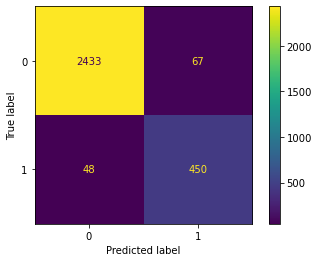

In [79]:
# Generate array of values for confusion matrix
preds = second_rf.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels = second_rf.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = second_rf.classes_)
disp.plot(values_format = '');

There are more false positives than false negatives predicted by the model, suggesting that some employees might be mistakenly identified as at risk of quitting or being fired. However, it is still a robust model.

For detailed exploration, it may be beneficial to analyze the decision tree model's splits and determine the most significant features in the random forest model.

#### Decision tree splits

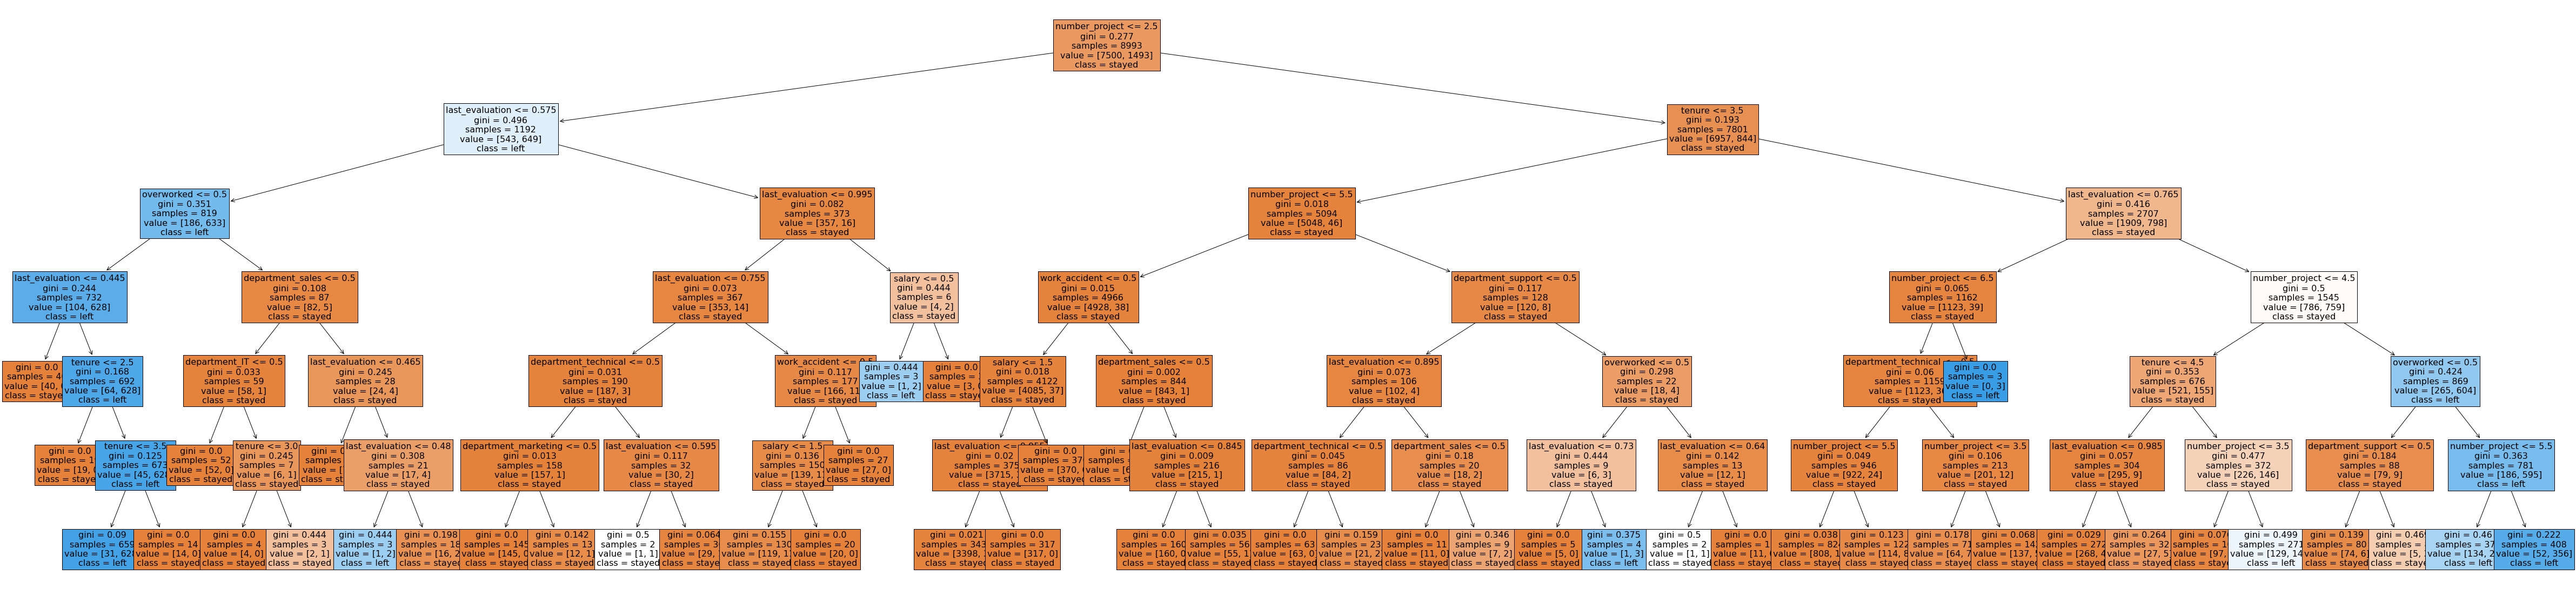

In [80]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(second_tree.best_estimator_, max_depth = 6, fontsize = 16, feature_names = X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision tree feature importance

In [81]:
second_tree_importances = pd.DataFrame(second_tree.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
second_tree_importances = second_tree_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
second_tree_importances = second_tree_importances[second_tree_importances['gini_importance'] != 0]
second_tree_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


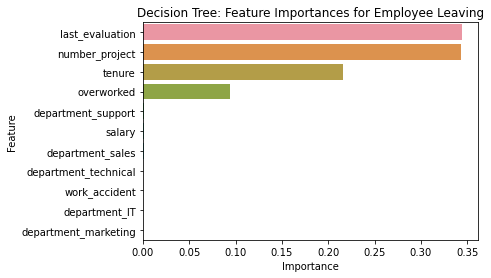

In [82]:
# Create a barplot to display the feature importances within the decision tree model.
sns.barplot(data = second_tree_importances, x = "gini_importance", y = second_tree_importances.index, orient = 'h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize = 12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

According to the barplot, `last_evaluation`, `number_project`, `tenure`, and `overworked` are the top important features in this decision tree model. These variables are most useful in predicting the outcome variable, `left`.

#### Random forest feature importance

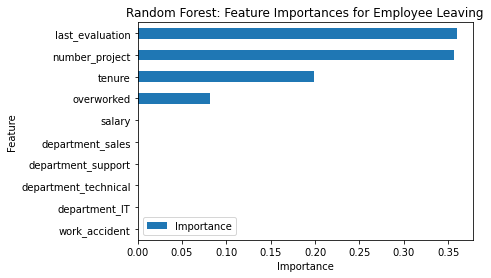

In [83]:
# Get feature importances
feat_impt = second_rf.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(second_rf.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind = 'barh', ax = ax1, x = "Feature", y = "Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize = 12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

According to the plot, the random forest model identifies `last_evaluation`, `number_project`, `tenure`, and `overworked` as the most significant variables, respectively. These variables are highly effective in predicting the outcome variable, `left`, and are the same ones used in the decision tree model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



**Answers:** 

* Employees are overworked, supported by model results. The random forest model outperforms the decision tree in predicting employee attrition;

* Limit the number of projects per employee, promote or investigate dissatisfaction of long-tenured employees, reward longer work hours or remove the requirement, clarify overtime pay policies and workload expectations, address work culture through discussions, and implement a proportionate scale for evaluation scores;

* Highlight the importance of addressing these issues to managers and regularly assess workload and employee satisfaction;

* Address potential data leakage by testing predictions without last_evaluation and explore additional feature engineering and alternative models;

* Investigate how employee benefits, work-life balance, and team dynamics impact attrition, and predict the effect of specific interventions on retention;

* Previous notebooks were used as resources and guides; 

* When presenting results to stakeholders, ensure transparency about the model's limitations and assumptions. Clearly explain the model and its outcomes to avoid misinterpretation. Respect employee privacy by anonymizing data. Communicate the ethical implications of recommendations to ensure fairness and protect employee well-being.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

#### Tree-Based Machine Learning

With feature engineering applied, the decision tree model reached an AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2% on the test set. The random forest demonstrated slightly superior performance compared to the decision tree model.

### Conclusion, Recommendations, Next Steps

#### Conclusion

The models and their feature importances confirm that employees are overworked.

#### Recommendations

* Limit the number of projects employees can handle;

* Promote employees with at least four years of tenure or investigate their dissatisfaction;

* Reward longer work hours or eliminate the requirement;

* Clarify overtime pay policies and workload expectations;

* Hold discussions to address work culture;

* Use a proportionate scale for rewarding high evaluation scores instead of reserving it for those working 200+ hours.

#### Next Steps

* Address potential data leakage by evaluating predictions without `last_evaluation`;

* Consider predicting performance scores if evaluation scores heavily influence employee retention;

* Similar considerations should apply to satisfaction scores.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.